In [4]:
import numpy as np
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt

In [16]:
num_dims = 256
load_path = "Zelda/LegendOfZeldaALinkToThePast-Snes_ram.npy"
x = np.load(load_path)
print(x.shape)

(784, 147456)


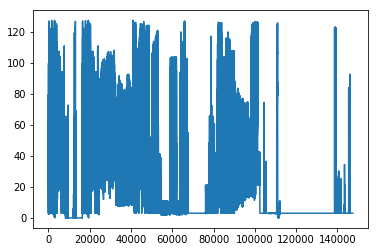

In [51]:
stds = np.std(x, axis=0)
x_axis = np.arange(len(stds))


fig, ax = plt.subplots()
ax.plot(x_axis, stds)

In [24]:
first_8_k = x[:,0:8192]
print(first_8_k.shape)

(784, 8192)


In [64]:
pca = PCA(n_components=64)
pca.fit(first_8_k)

PCA(copy=True, iterated_power='auto', n_components=64, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [67]:
with open(f"PCA_Zelda_30min_64.pickle", 'wb') as f:
    pickle.dump(pca, f)

pca = PCA(n_components=num_dims)
pca.fit(fourk_x)


In [69]:
sum(pca.explained_variance_ratio_)
pca.transform(first_8_k)

array([[ 1933.24365556,   761.3529795 ,  2580.80612886, ...,
          -10.0437632 ,    42.26674127,   -95.2086628 ],
       [ 3767.04278949,  1512.67707126,  4483.67594041, ...,
         -126.3492975 ,   233.04149027,   132.46538916],
       [ 3802.24261979,  1580.45927364,  4520.9832952 , ...,
          -61.03362743,    16.42408112,    27.880025  ],
       ...,
       [  489.24650484,   304.37146175,  3060.23618087, ...,
          376.59183856,   656.79856516,    19.92367844],
       [-1572.56433391,   -65.42118224,   322.55216064, ...,
          311.83264348,   587.78154796,   -72.69985696],
       [-1573.00291966,   -68.17372702,   318.52279682, ...,
          310.68143216,   584.89688403,   -99.47207574]])

In [49]:
transformed = pca.transform(k_rand)
transformed = np.abs(transformed)
transformed = np.mean(transformed, axis=0)
transformed = np.sum(transformed)
transformed

5463.493398576976

In [76]:
x_axis = range(10)
y_axis = []
counter = 0
for dim_exp in x_axis :
    counter += 1
    print(counter)
    pca = PCA(n_components=2**dim_exp)
    pca.fit(fourk_x)
    transformed = pca.transform(k_rand)
    transformed = np.abs(transformed)
    transformed = np.mean(transformed, axis=0)
    transformed = np.sum(transformed)
    y_axis.append(transformed)


1
2
3
4
5
6
7
8
9
10


[Text(0,0,'1'),
 Text(0,0,'2'),
 Text(0,0,'4'),
 Text(0,0,'8'),
 Text(0,0,'16'),
 Text(0,0,'32'),
 Text(0,0,'64'),
 Text(0,0,'128'),
 Text(0,0,'256'),
 Text(0,0,'512')]

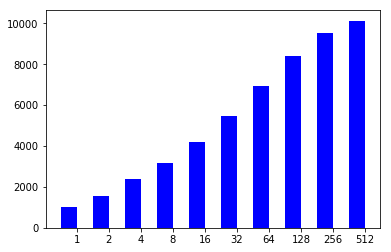

In [77]:
fig, ax = plt.subplots()
x_axis = np.array(x_axis)
x_axis_ticks = [2**x for x in x_axis]
ax.bar(x_axis, y_axis, .5, color='b')
ax.set_xticks(x_axis + .5 / 2)
ax.set_xticklabels(x_axis_ticks)
